<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/PRELIMS/HOA_6_1_Introduction_to_Data_Analysis_and_Tools.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hands-on Activity 6.1 Introduction to Data Analysis and Tools**

**CPE311 Computational Thinking with Python**

Name: Castillo, Ronel Christian V

Section: CPE22S2

Performed on: 06/20/2024

Submitted on: 06/23/2024

Submitted to: Engr. Roman M. Richard

# **6.1 Intended Learning Outcome**

1. Use pandas and numpy data analysis tools.
2. Demonstrate how to analyze data using numpy and pandas

# **6.2 Resources:**
Personal Computer

Jupyter Notebook

Internet Connection

**# 6.3 Supplementary Activities:**

**Exercise 1**

Run the given code below for exercises 1 and 2, perform the given tasks without using any Python modules

In [ ]:
import random
random.seed(0)
salaries = [round(random.random()*1000000, -3) for _ in range(100)]

Using the data generated above, calculate the following statistics without importing anything from the statistics module in the
standard library (https://docs.python.org/3/library/statistics.html) and then confirm your results match up to those that are
obtained when using the statistics module (where possible):

Mean

Median

Mode (hint: check out the Counter in the collections module of the standard library at
https://docs.python.org/3/library/collections.html#collections.Counter)

Sample variance

Sample standard deviation


In [ ]:
import statistics as stats
from collections import Counter
from math import isnan
from itertools import filterfalse
import math
data=salaries
meanSal= stats.mean(data)
print("Mean using statisctics module:",meanSal)

total_sum = 0
length= len(data)
for num in data:
    total_sum += num
    mean=total_sum/length
print("Mean without using Statistics Module:", mean)

med=stats.median(data)
print("\nMedian Using stats module:", med)

def getMedian(lst):
    sorted_list = sorted(lst)
    mid = len(sorted_list) // 2
    if len(sorted_list) % 2 == 0:
        median = (sorted_list[mid] + sorted_list[-mid-1]) / 2
    else:
        median = sorted_list[mid]
    return median
result = getMedian(data)
print(f"Median without using Stats module: {result}")


mode=stats.mode(data)
print("\nMode using stats module:", mode)

from collections import Counter
n_num = salaries
n = len(n_num)

data = Counter(n_num)
get_mode = dict(data)
mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]

if len(mode) == n:
	get_mode = "No mode found"
else:
	get_mode = "Mode without stats library is / are: " + ', '.join(map(str, mode))

print(get_mode)

sv=stats.variance(data)
print("\nSample Variance using stats module:", sv)

meanSqred= [(x-meanSal) ** 2 for x in data]
sumOfMeanSqred=sum(meanSqred)
sampVar= sumOfMeanSqred/ (len(data)-1)
print("Variance using stats module:", sampVar)

stanDev= stats.stdev(data)
print(f"\nStandard Deviation using stats module: {stanDev:.2f}")

devData = data
variance = sum((x - mean) ** 2 for x in devData) / len(devData)
std_dev = math.sqrt(sv)

print(f"Sample Standard Deviation without python modules: {std_dev:.2f}")

Mean using statisctics module: 585690.0
Mean without using Statistics Module: 585690.0

Median Using stats module: 589000.0
Median without using Stats module: 589000.0

Mode using stats module: 477000.0
Mode without stats library is / are: 477000.0

Sample Variance using stats module: 72625796640.53752
Variance using stats module: 72637231377.65958

Standard Deviation using stats module: 269491.74
Sample Standard Deviation without python modules: 269491.74


# **Exercise 2**
Using the same data, calculate the following statistics using the functions in the statistics module where appropriate:

Range

Coefficient of variation Interquartile range

Quartile coefficient of dispersion

In [ ]:
range = max(salaries) - min(salaries)

mean = meanSal
standardDev = stanDev
COV = (standardDev / mean) * 100

def cal_iqr(data):
    sorted_data = sorted(data)
    q1 = getMedian(data)
    q3 = getMedian(sorted_data[(len(sorted_data) + 1) // 2:])
    return q3 - q1

iqr = cal_iqr(salaries)

def cal_qd(data):
    sorted_data = sorted(data)
    q1 = getMedian(data)
    q3 = getMedian(sorted_data[(len(sorted_data) + 1) // 2:])
    return (q3 - q1) / (q3 + q1)

qd = cal_qd(salaries)

# output
print(f"Range:", range)
print(f"Coefficient of Variation:", COV,"%")
print(f"Interquartile Range:", iqr)
print(f"Quartile Coefficient of Dispersion:", qd)

Range: 995000.0
Coefficient of Variation: 46.01269231349201 %
Interquartile Range: 230500.0
Quartile Coefficient of Dispersion: 0.16364927227547035


# **Exercise 3: Pandas for Data Analysis**
Load the diabetes.csv file. Convert the diabetes.csv into dataframe
Perform the following tasks in the diabetes dataframe:
1. Identify the column names
2. Identify the data types of the data
3. Display the total number of records





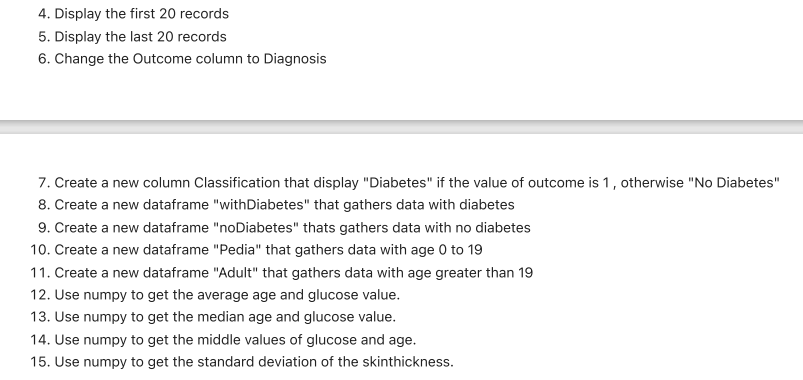

In [ ]:
import pandas as pd
filepath= '/content/diabetes.csv'
data= pd.read_csv(filepath)
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.columns

# display columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.describe()
# indentify data types


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
print(f"Total number of records: {len(data)}")
# total number of records using pandas

Total number of records: 768


In [ ]:
data.head(20)
# display the first 20 records



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail(20)
# display the last 20 records

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
748,3,187,70,22,200,36.4,0.408,36,1
749,6,162,62,0,0,24.3,0.178,50,1
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data = data.rename(columns={'Outcome': 'Diagnosis'})
# rename outcomes to Diagnosis
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data['Classification'] = data['Diagnosis'].apply(lambda x: 'Diabetes' if x == 1 else 'No Diabetes')
data.head()
# Create a new column Classification that display
# "Diabetes" if the value of outcome is 1 , otherwise "No Diabetes"

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Classification
0,6,148,72,35,0,33.6,0.627,50,1,Diabetes
1,1,85,66,29,0,26.6,0.351,31,0,No Diabetes
2,8,183,64,0,0,23.3,0.672,32,1,Diabetes
3,1,89,66,23,94,28.1,0.167,21,0,No Diabetes
4,0,137,40,35,168,43.1,2.288,33,1,Diabetes


In [ ]:
withDiabetes= data[data['Diagnosis'] == 1]
withDiabetes.head(20)
# Create a new dataframe "withDiabetes" that gathers data with diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Classification
0,6,148,72,35,0,33.6,0.627,50,1,Diabetes
2,8,183,64,0,0,23.3,0.672,32,1,Diabetes
4,0,137,40,35,168,43.1,2.288,33,1,Diabetes
6,3,78,50,32,88,31.0,0.248,26,1,Diabetes
8,2,197,70,45,543,30.5,0.158,53,1,Diabetes
9,8,125,96,0,0,0.0,0.232,54,1,Diabetes
11,10,168,74,0,0,38.0,0.537,34,1,Diabetes
13,1,189,60,23,846,30.1,0.398,59,1,Diabetes
14,5,166,72,19,175,25.8,0.587,51,1,Diabetes
15,7,100,0,0,0,30.0,0.484,32,1,Diabetes


In [ ]:
noDiabetes= data[data['Diagnosis'] == 0]
noDiabetes.head(20)
#  Create a new dataframe "noDiabetes" thats gathers data with no diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Classification
1,1,85,66,29,0,26.6,0.351,31,0,No Diabetes
3,1,89,66,23,94,28.1,0.167,21,0,No Diabetes
5,5,116,74,0,0,25.6,0.201,30,0,No Diabetes
7,10,115,0,0,0,35.3,0.134,29,0,No Diabetes
10,4,110,92,0,0,37.6,0.191,30,0,No Diabetes
12,10,139,80,0,0,27.1,1.441,57,0,No Diabetes
18,1,103,30,38,83,43.3,0.183,33,0,No Diabetes
20,3,126,88,41,235,39.3,0.704,27,0,No Diabetes
21,8,99,84,0,0,35.4,0.388,50,0,No Diabetes
27,1,97,66,15,140,23.2,0.487,22,0,No Diabetes


In [ ]:
Pedia= data[data['Age'] <= 19]
Pedia.head(20)

# Create a new DataFrame "Pedia" that gathers data with age 0 to 19

# current data set has no data with ages < 20

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Classification


In [ ]:
Adult= data[data['Age'] > 19]
Adult.head(20)

# Create a new DataFrame "Adult" that gathers data with age greater than 19

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diagnosis,Classification
0,6,148,72,35,0,33.6,0.627,50,1,Diabetes
1,1,85,66,29,0,26.6,0.351,31,0,No Diabetes
2,8,183,64,0,0,23.3,0.672,32,1,Diabetes
3,1,89,66,23,94,28.1,0.167,21,0,No Diabetes
4,0,137,40,35,168,43.1,2.288,33,1,Diabetes
5,5,116,74,0,0,25.6,0.201,30,0,No Diabetes
6,3,78,50,32,88,31.0,0.248,26,1,Diabetes
7,10,115,0,0,0,35.3,0.134,29,0,No Diabetes
8,2,197,70,45,543,30.5,0.158,53,1,Diabetes
9,8,125,96,0,0,0.0,0.232,54,1,Diabetes


In [ ]:
# use numphy to get the average age and glucose value
import numpy as np

aveAge = np.mean(data['Age'])
averageGlucose = np.mean(data['Glucose'])

print(f"Average age: {aveAge:.2f}")
print(f"Average glucose: {averageGlucose:.2f}")

# :.2f to display only 2 decimal points

Average age: 33.24
Average glucose: 120.89


In [ ]:
medAge= np.median(data['Age'])
medGlucose= np.median(data['Glucose'])

print (f"Median age: {medAge}")
print(f"Median glucose: {medGlucose}")

# get median of age and glucose

Median age: 29.0
Median glucose: 117.0


In [ ]:
medAge= np.median(data['Age'])
medGlucose= np.median(data['Glucose'])

print (f"Median age: {medAge}")
print(f"Median glucose: {medGlucose}")

# get the middle values of glucose and age


Median age: 29.0
Median glucose: 117.0


In [ ]:
stanDev= np.std(data['SkinThickness'])

print(f"Standard deviation of skin thickness: {stanDev:.2f}")

# get the standard deviation of skin thickness

Standard deviation of skin thickness: 15.94


# **6.4 Conclusion**

learning about the basics and uses of data analysis and the basic tools is an amazing experience. I was very much amazed with how amazing and useful these basic commands are, especially numpy since this might be our most used library for data science in terms of transforming data. Pandas are another amazing tool and I very much enjoyed using it.